## Before we start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that.

In [1]:
!nvidia-smi

Tue Jun 25 13:59:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## 1 - Installing YOLOv10

In [4]:
!pip install ultralytics


**NOTE:** We will also install two additional packages: [`roboflow`](https://github.com/roboflow/roboflow-python) to download the dataset from [Roboflow Universe](https://universe.roboflow.com/), which we will use to train our model, and [`supervision`](https://github.com/roboflow/supervision), which we will use for visualizing the results.

In [5]:
!pip install -q supervision roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00


## 2 - Download pre-trained weights

**NOTE:** YOLOv10 provides weight files pre-trained on the COCO dataset in various sizes. Let's download them.

In [6]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov8/releases/download/v1.0/yolov8n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov8/releases/download/v1.0/yolov8s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov8/releases/download/v1.0/yolov8m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov8/releases/download/v1.0/yolov8b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov8/releases/download/v1.0/yolov8x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov8/releases/download/v1.0/yolov8l.pt
!ls -lh {HOME}/weights


total 0


## 3 - Download Cacao_disease dataset from Roboflow Universe

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Na2noS4VFOBLbUgiV2wh")
project = rf.workspace("aldhitaproject-d4fju").project("cocoa_disease")
version = project.version(3)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to cocoa_disease-3 in yolov8:: 100%|██████████| 4194/4194 [00:00<00:00, 5202.80it/s]


### Split training and validation set

In [8]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

## Custom Training

In [12]:
%cd {HOME}

!yolo task=detect mode=train epochs=10 batch=32 plots=True \
model={HOME}/weights/yolov8n.pt \  # Replace yolov10n.pt with yolov8n.pt
data={dataset.location}/data.yaml


/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 514, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 324, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: ' ' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'task=detect', 'mode=train', 'epochs=10', 'batch=32', 'plots=True', 'model=/content/weights/yolov8n.pt', ' ']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'segment', 'obb', 'pose', 'detect', 'classify'}
                MODE (required) is one of {'predict', 'export', 'train', 'benchmark', 'track', 'val'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' t

NameError: name 'data' is not defined

In [10]:
!ls {HOME}/runs/detect/train/

ls: cannot access '/content/runs/detect/train/': No such file or directory


In [11]:
from IPython.display import Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train/confusion_matrix.png'

/content


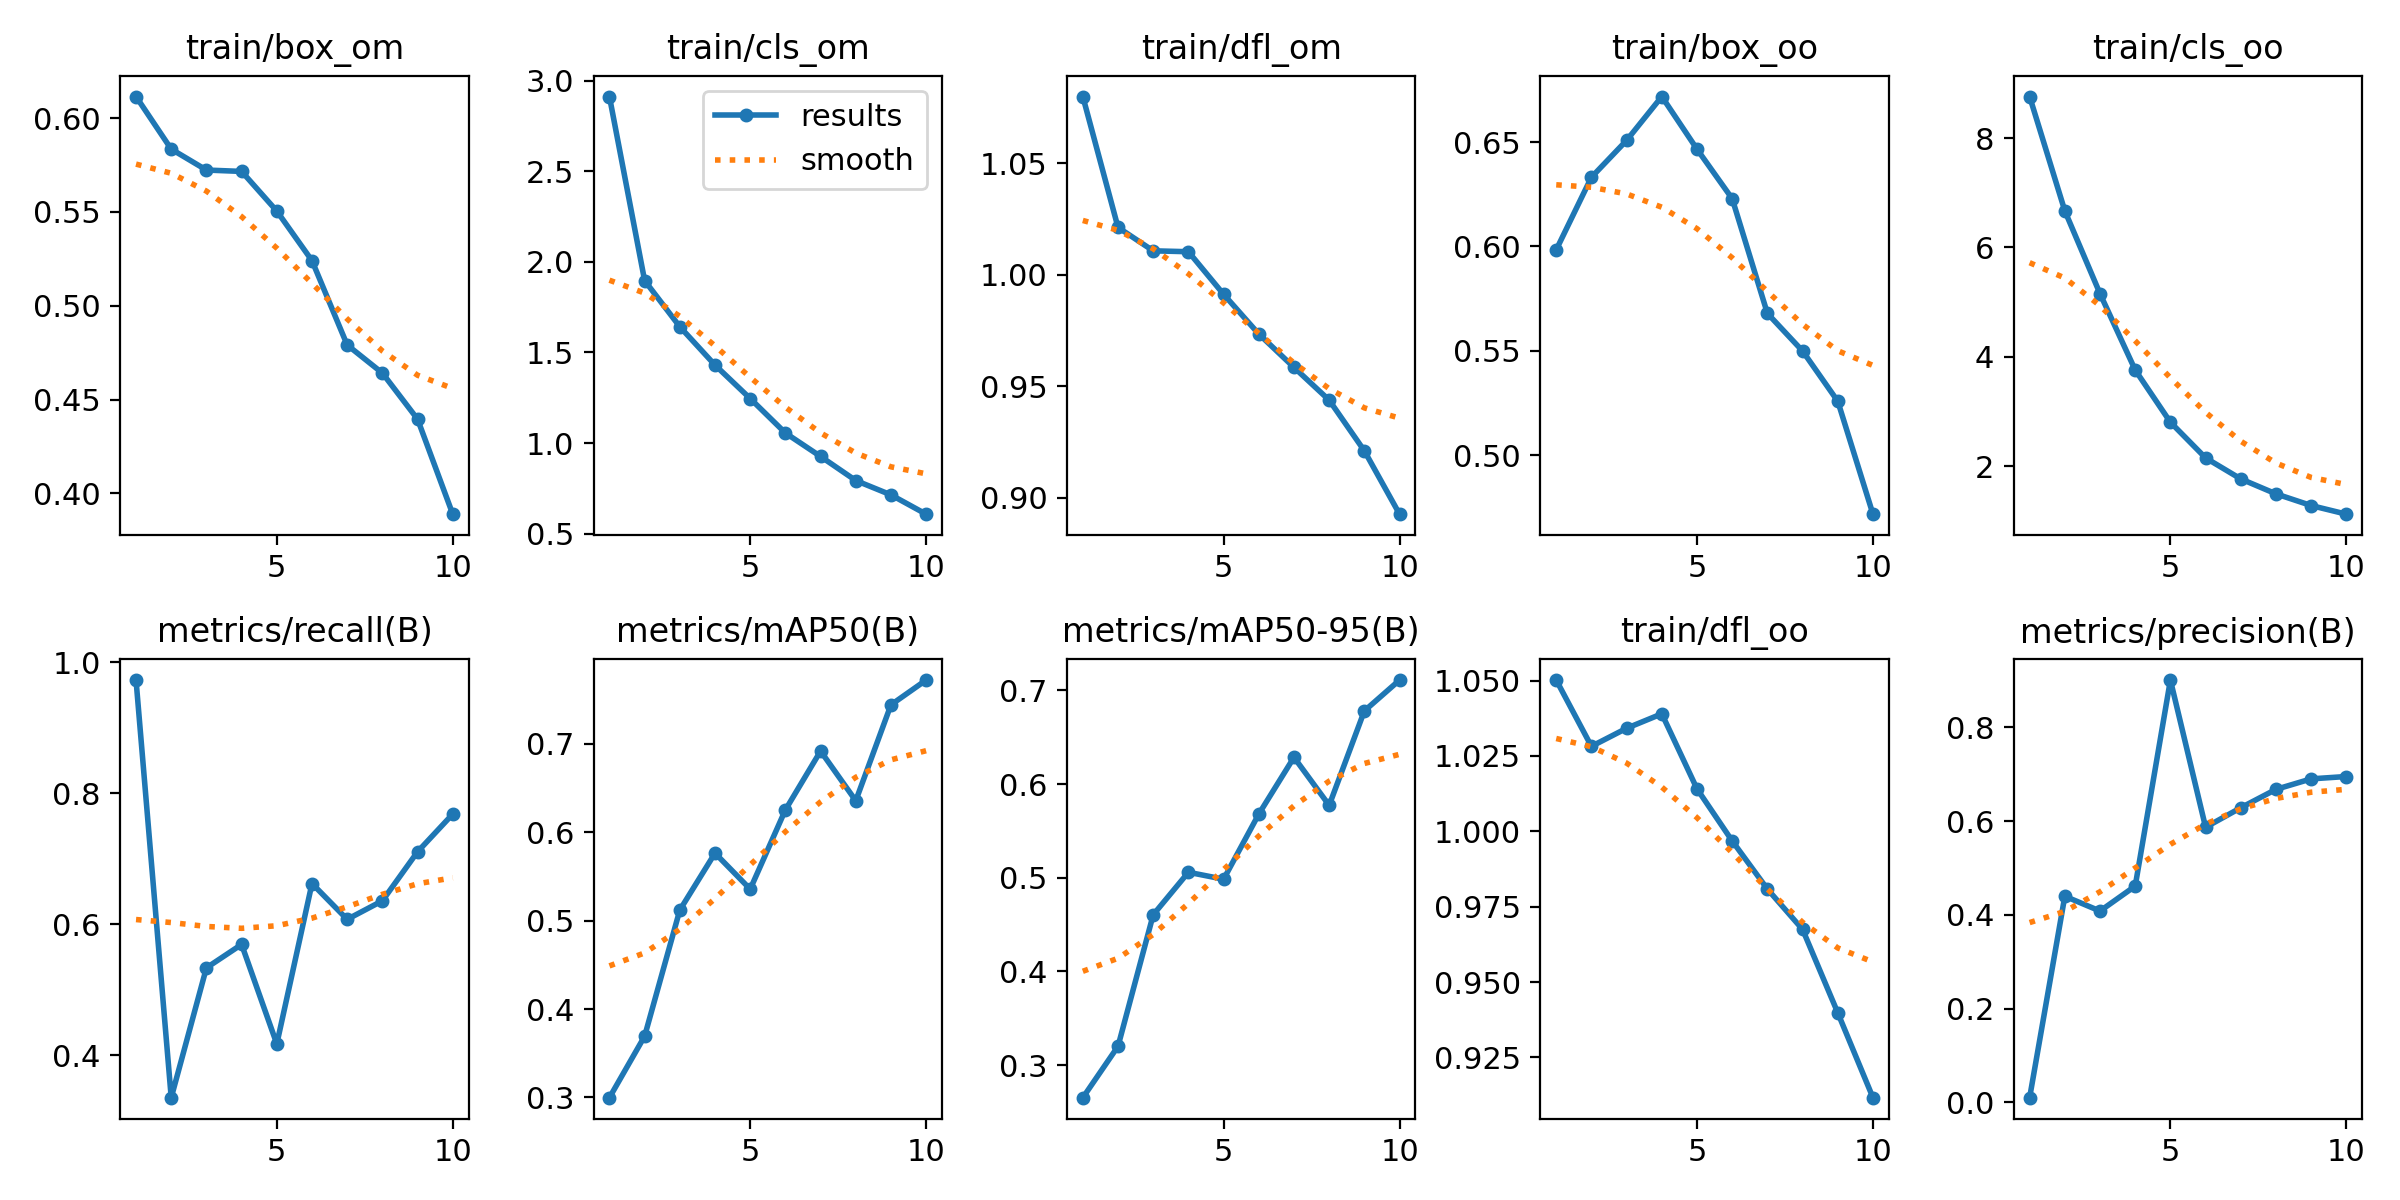

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Inference with Custom Model

In [ ]:
# Import the necessary libraries
from ultralytics import YOLO
import supervision as sv  # Assuming `sv` is an alias for `supervision`
import os  # Needed to handle file paths

**Loading our newly trained model**

In [ ]:
from ultralytics import YOLO

model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()


AttributeError: 'DetectionDataset' object has no attribute 'location'

In [ ]:
from ultralytics import YOLO

model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path= ('/content/datasets/cocoa_disease-3/valid/images'),
    annotations_directory_path=('/content/datasets/cocoa_disease-3/valid/labels'),
    data_yaml_path=('/content/datasets/cocoa_disease-3/data.yaml')
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

**NOTE:** Let's randomly select an image from our validation set and visualize the results.

In [ ]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

AttributeError: 'dict' object has no attribute 'shape'

#Visualizing Results

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Visualizing Results Using our Own Photos**


0: 640x384 1 vase, 11.5ms
Speed: 2.6ms preprocess, 11.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)
Image: Phytophthora.png


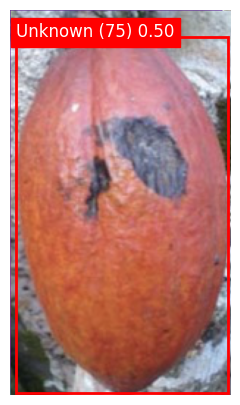


0: 480x640 1 orange, 8.7ms
Speed: 3.6ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Image: Monilia.png


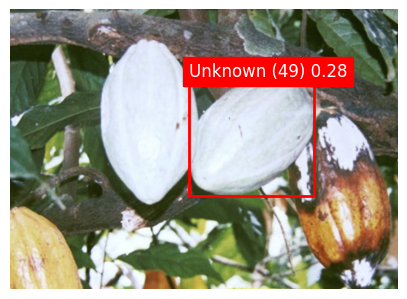


0: 512x640 2 bears, 12.0ms
Speed: 3.8ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)
Image: Phytophthora 2.png


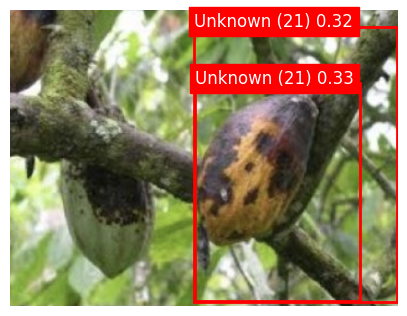


0: 448x640 (no detections), 10.3ms
Speed: 2.2ms preprocess, 10.3ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Image: Fruit Suckers.jpeg
No detections

0: 640x480 (no detections), 10.7ms
Speed: 3.6ms preprocess, 10.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
Image: Healthy.jpeg
No detections

0: 640x480 2 persons, 1 sports ball, 10.4ms
Speed: 3.2ms preprocess, 10.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)
Image: Fruit Borers.jpeg


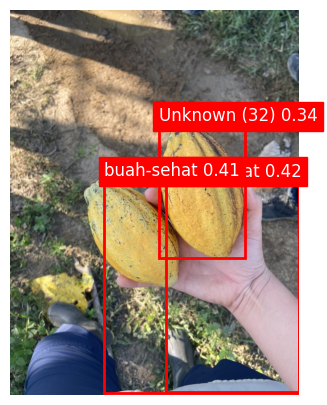


0: 640x480 (no detections), 9.0ms
Speed: 4.5ms preprocess, 9.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
Image: Fruit Borers 2.jpeg
No detections

0: 640x288 (no detections), 11.2ms
Speed: 3.5ms preprocess, 11.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 288)
Image: Healthy 2.jpeg
No detections

0: 480x640 (no detections), 13.4ms
Speed: 3.5ms preprocess, 13.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
Image: Mix.jpeg
No detections


In [ ]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # Use the appropriate model file

# These are the classes of cacao disease our model can predict
classnames = ['buah-sehat', 'busukbuah-monilia', 'busukbuah-phytophthora', 'penggerek-buah', 'penghisap-buah']

# Path to the folder with images to predict
predict_folder = '/content/gdrive/MyDrive/Colab Notebooks/Comp Vision/CacaoPred'
predict_image_files = [f for f in os.listdir(predict_folder) if os.path.isfile(os.path.join(predict_folder, f))]

# Function to visualize predictions
def visualize_predictions(image, results):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    ax = plt.gca()

    for result in results:
        for box in result.boxes:
            coords = box.xyxy[0].cpu().numpy()  # Extract bounding box coordinates
            cls_id = int(box.cls[0])  # Extract class ID

            # Check if cls_id is within the valid range of classnames
            if cls_id < len(classnames):
                label = classnames[cls_id]  # Get class name
            else:
                label = f"Unknown ({cls_id})" # Handle cases where cls_id is out of range
                print(f"Warning: Unknown class ID encountered: {cls_id}") # Print a warning

            score = box.conf[0]  # Extract confidence score

            # Draw bounding box
            rect = plt.Rectangle((coords[0], coords[1]), coords[2] - coords[0], coords[3] - coords[1], fill=False, color='red', linewidth=2)
            ax.add_patch(rect)

            # Draw label and score
            plt.text(coords[0], coords[1], f'{label} {score:.2f}', color='white', fontsize=12, backgroundcolor='red')

    plt.axis('off')
    plt.show()

# Predict and display results for each image
for file_idx in range(len(predict_image_files)):
    img_path = os.path.join(predict_folder, predict_image_files[file_idx])
    img = Image.open(img_path).convert('RGB')

    # Convert image to numpy array
    img_array = np.array(img)

    # Predict using YOLOv8 model
    results = model(img_array)

    # Display the results
    print(f"Image: {predict_image_files[file_idx]}")
    if any(result.boxes for result in results):  # Check if there are any boxes
        visualize_predictions(img, results)
    else:
        print("No detections")

**Visualizing Results Using Roboflow Set**

In [ ]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # Use the appropriate model file

# These are the classes of cacao disease our model can predict
classnames = ['buah-sehat', 'busukbuah-monilia', 'busukbuah-phytophthora', 'penggerek-buah', 'penghisap-buah']

# Path to the folder with images to predict
predict_folder = '/content/datasets/cocoa_disease-3/test'
predict_image_files = [f for f in os.listdir(predict_folder) if os.path.isfile(os.path.join(predict_folder, f))]

# Function to visualize predictions
def visualize_predictions(image, results):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    ax = plt.gca()

    for result in results:
        for box in result.boxes:
            coords = box.xyxy[0].cpu().numpy()  # Extract bounding box coordinates
            cls_id = int(box.cls[0])  # Extract class ID

            # Check if cls_id is within the valid range of classnames
            if cls_id < len(classnames):
                label = classnames[cls_id]  # Get class name
            else:
                label = f"Unknown ({cls_id})" # Handle cases where cls_id is out of range
                print(f"Warning: Unknown class ID encountered: {cls_id}") # Print a warning

            score = box.conf[0]  # Extract confidence score

            # Draw bounding box
            rect = plt.Rectangle((coords[0], coords[1]), coords[2] - coords[0], coords[3] - coords[1], fill=False, color='red', linewidth=2)
            ax.add_patch(rect)

            # Draw label and score
            plt.text(coords[0], coords[1], f'{label} {score:.2f}', color='white', fontsize=12, backgroundcolor='red')

    plt.axis('off')
    plt.show()

# Predict and display results for each image
for file_idx in range(len(predict_image_files)):
    img_path = os.path.join(predict_folder, predict_image_files[file_idx])
    img = Image.open(img_path).convert('RGB')

    # Convert image to numpy array
    img_array = np.array(img)

    # Predict using YOLOv8 model
    results = model(img_array)

    # Display the results
    print(f"Image: {predict_image_files[file_idx]}")
    if any(result.boxes for result in results):  # Check if there are any boxes
        visualize_predictions(img, results)
    else:
        print("No detections")

In [ ]:
import os
import cv2
from ultralytics import YOLO

# Define the path to the test folder and the class names
test_folder = '/content/datasets/cocoa_disease-3/test'
classnames = ['buah-sehat', 'busukbuah-monilia', 'busukbuah-phytophthora', 'penggerek-buah', 'penghisap-buah']

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Change the model name as needed (yolov8n, yolov8s, etc.)

# Function to make predictions on a single image
def predict_image(image_path, model, classnames):
    # Load the image
    image = cv2.imread(image_path)

    # Make predictions
    results = model.predict(image)

    # Process results
    predictions = results.pred[0]
    for *box, conf, cls in predictions:
        cls = int(cls)
        class_name = classnames[cls]
        print(f"Class: {class_name}, Confidence: {conf}, Box: {box}")

    return predictions

# Loop through all images in the test folder and make predictions
for filename in os.listdir(test_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(test_folder, filename)
        print(f"Processing image: {image_path}")
        predictions = predict_image(image_path, model, classnames)


#Report


**Model Process:**
Number of epochs chosen...
Why we chose our visualization method...

Predicting Process:
1. Using our own set: We first wanted to try using our own photo set to try and predict new cacao diseases. However when doing so we found the accuracy to reduce quite a bit. With a significant amount of 'unknown' detections and only one cacao disease correctly detected out of our 9 photos. We assume this is due to only having 9 photos and perhaps due to the nuances of how the diseases appear in real life scenarios.
2. Using the roboflow set: So then we pivoted to use the test set for predicting dieases.

**Analysis of Results:**
Confussion Matrix: We can assume our model is perfoming well given that the filled in 'blue boxes' are in a diagonol.
mAP analysis: Both mAP50 and mAP95 are quite high as well
Recall: Trending upwards, so we will take that as a sign that our model is performing well, although it is a bit lower than the precision
Precision: Trending upwards as well, so a good sign for the model performance.

**Take-Aways:**